
#### Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
#### Реализуйте удаление периодического шума

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = cv2.imread('drive/MyDrive/hw_DE_IP/hw_5/periodic_noise.JPG',
                   cv2.IMREAD_GRAYSCALE)

def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)

    for i in range(len(imgs)):
        #img = T.ToPILImage()(imgs[i])
        axs[0, i].imshow(np.asarray(imgs[i]), cmap='gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

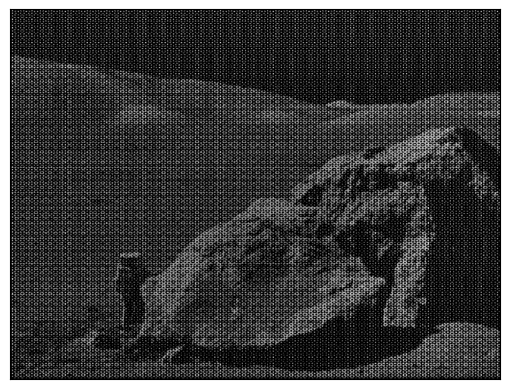

In [ ]:
 #Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
 blurred = cv2.GaussianBlur(image, (0, 0), 100)
 highpass = cv2.subtract(image, blurred)
 show([highpass])

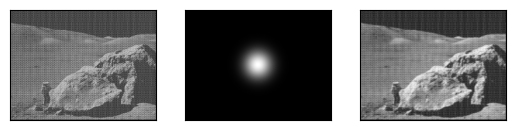

In [ ]:
# Реализуйте удаление периодического шума

def remove_periodic_noise_using_circle(img, radius=30):
  # преобразование Фурье
  dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

  # Создаем Маску
  mask = np.ones_like(magnitude_spectrum, dtype=np.float32)
  centerX, centerY = img.shape[0] // 2, img.shape[1] // 2
  x = np.arange(img.shape[0]) - centerX
  y = np.arange(img.shape[1]) - centerY
  xx, yy = np.meshgrid(x, y)
  distance = np.sqrt(xx**2 + yy**2)
  smooth_transition = np.exp(-distance**2 / (2 * radius**2))
  smooth_transition = np.transpose(smooth_transition)
  mask *= smooth_transition

  # Применяем маску к сдвинутому Фурье
  dft_shift_filtered = dft_shift * mask[:,:,np.newaxis]

  # Применяем маску к сдвинутому Фурье
  f_ishift = np.fft.ifftshift(dft_shift_filtered)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

  show([img, mask, img_back])


remove_periodic_noise_using_circle(image, radius=50)